# Few Body Explorations

Let's explore the few body solver now

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import three_body

In [22]:
M1 = 150.0
p1 = (3, 1)

M2 = 200.0
p2 = (-1, -2)

M3 = 250.0
p3 = (-1, 1)

In [23]:
tb = three_body.ThreeBody(M1, p1, M2, p2, M3, p3)

In [24]:
dt_init = 0.5
tmax = 2.0

eps = 1.e-8

In [25]:
tb.integrate(dt_init, eps, tmax)

Let's look at the evolution first

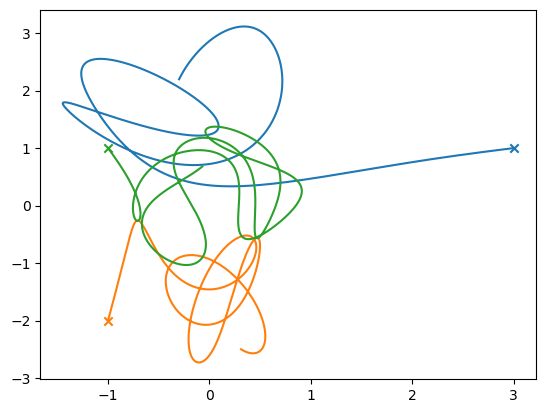

In [9]:
fig, ax = plt.subplots()

for istar in range(len(tb.M)):                                                             
    x = [star[istar].x for star in tb.stars]
    y = [star[istar].y for star in tb.stars]

    ax.plot(x, y)
    ax.scatter([x[0]], [y[0]], marker="x")

Now the center of mass&mdash;since the stars started out at rest, the center of mass should not move (there are no external forces)

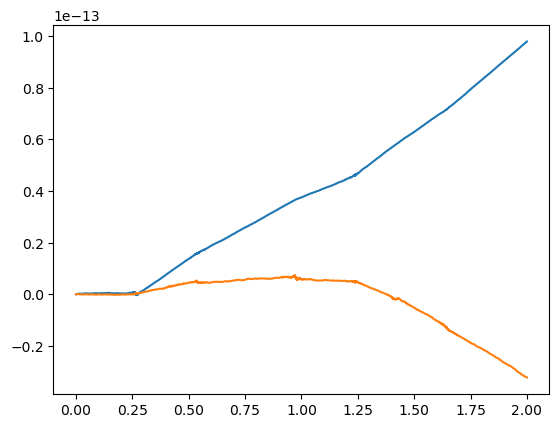

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
 
t = tb.time
x_cm = []
y_cm = []
for n in range(tb.npts()):
    _xcm, _ycm = tb.center_of_mass(n)                                                      
    x_cm.append(_xcm)                                                                      
    y_cm.append(_ycm)                                                                      

ax.plot(t, x_cm, label="x center of mass")
ax.plot(t, y_cm, label="y center of mass")

Now the energy

Text(0, 0.5, '|E|')

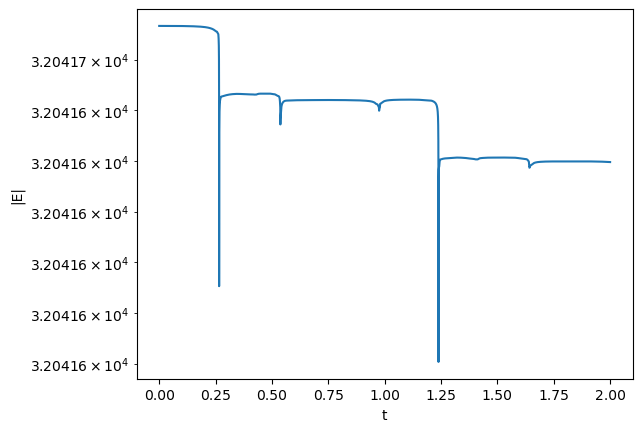

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

E = []
for n in range(tb.npts()):
    E.append(tb.energy(n))                                                                 

ax.plot(t, np.abs(E))
    
ax.set_yscale("log")

ax.set_xlabel("t")
ax.set_ylabel("|E|")

What about the softening length?

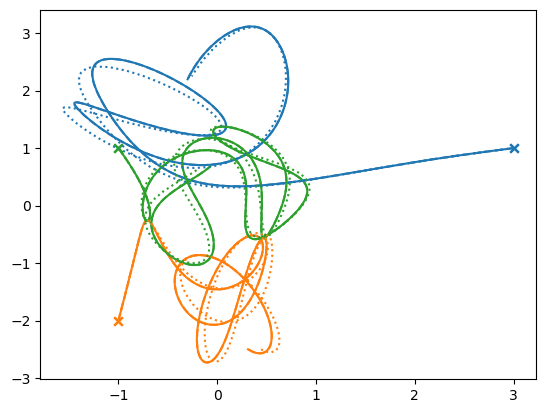

In [28]:
fig, ax = plt.subplots()

ls = ["-", "--", ":"]

for n, eps in enumerate([1.e-12, 1.e-6, 1.e-4]):
    
    tb = three_body.ThreeBody(M1, p1, M2, p2, M3, p3, SMALL=eps)
    tb.integrate(dt_init, eps, tmax)

    for c, istar in enumerate(range(len(tb.M))):                                                             
        x = [star[istar].x for star in tb.stars]
        y = [star[istar].y for star in tb.stars]

        ax.plot(x, y, ls=ls[n], color=f"C{c}")
        ax.scatter([x[0]], [y[0]], marker="x", color=f"C{c}")

Let's look at some more initial conditions

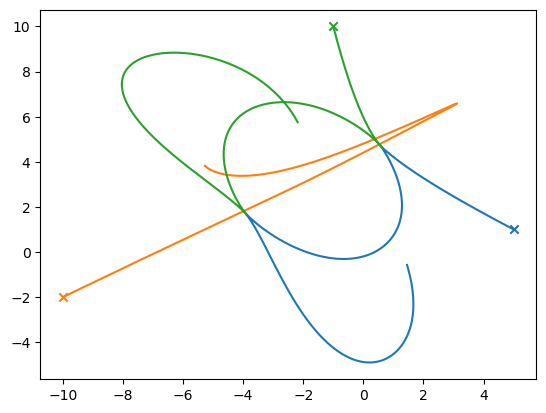

In [38]:
M1 = 100.0
p1 = (5, 1)

M2 = 100.0
p2 = (-10, -2)

M3 = 100.0
p3 = (-1, 10)

tmax = 10
eps = 1.e-8
tb = three_body.ThreeBody(M1, p1, M2, p2, M3, p3)
tb.integrate(dt_init, eps, tmax)

fig, ax = plt.subplots()

for istar in range(len(tb.M)):                                                             
    x = [star[istar].x for star in tb.stars]
    y = [star[istar].y for star in tb.stars]

    ax.plot(x, y)
    ax.scatter([x[0]], [y[0]], marker="x")